## Estimate lognormal distribution of farm sizes

Classification of farmers based on land holdings is as follows:
Marginal: < 1 ha
Small: 1-2 ha
Semi-medium: 2-4 ha
Medium: 4-10 ha
Large: >10 ha

In [1]:
from scipy.stats import lognorm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load in the original data
df_orig = pd.read_pickle("../Data/Farmland/farmland_clean_per_district.pkl")

# Create a list with district names
districts = df_orig.index.levels[0].tolist()
districts

['Bellary', 'Chitradurga', 'Davanagere', 'Gadag', 'Haveri']

In [3]:
# Select the district from the dataframe
district = districts[0]
df_district = df_orig.loc[district]
sample_size = int(df_district["Number"].sum())

# Define the shape of the distribution
# The parameters can be adjusted based on the characteristics of your specific data
shape, loc, scale = 0.92, 0, 1.25

# Draw random samples from the distribution for each farmer
farm_sizes = lognorm.rvs(shape, loc, scale, size=sample_size)

# Cap farm sizes at 200 ha
farm_sizes = np.minimum(farm_sizes, 1000)

# Create a list of classes
classes = ['Marginal', 'Small', 'Semi medium', 'Medium', 'Large']

# Determine the number of farmers in each class
class_counts = np.histogram(farm_sizes, bins=[0, 1, 2, 4, 10, 200])[0]

# Determine the total area of land in each class. Take the sum of the farm sizes in each class.
class_areas = np.histogram(farm_sizes, bins=[0, 1, 2, 4, 10, 200], weights=farm_sizes)[0]

# Determine the average farm size in each class
class_sizes = class_areas / class_counts

# Create a dataframe with the results
df = pd.DataFrame({'Number': class_counts, 'Area': class_areas, 'Area per farmer': class_sizes}, index=classes)
df

,Number,Area,Area per farmer
Marginal,111104,64348.714763,0.579176
Small,80260,115151.391024,1.434730
Semi medium,55433,153931.019903,2.776884
Medium,25086,144778.693185,5.771294
Large,3267,47083.093954,14.411721


In [4]:
# Calculate the relative difference between the two dataframes.
df_rel = (df - df_district) / df_district

# Take  the absolute sum of all relative differences
sums = df_rel.abs().sum()
print(f"Average relative difference: {sums.mean():.2%}\n{sums}")

df_district

Average relative difference: 26.38%
Number             0.347983
Area               0.319055
Area per farmer    0.124262
dtype: float64


,Number,Area,Area per farmer
Size Class,,,
Marginal,105050.0,58680.0,0.558591
Small,82810.0,118360.0,1.429296
Semi medium,56560.0,153170.0,2.708098
Medium,26760.0,152630.0,5.703662
Large,3970.0,54680.0,13.773300


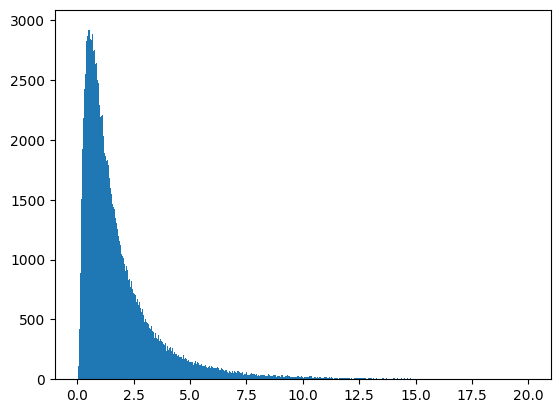

In [5]:
# Create a histogram of the farm sizes. Limit the x-axis to 30 ha.
plt.hist(farm_sizes, bins=1000, range=(0, 20))
plt.show()

In [6]:
# Load in the original data
df2 = pd.read_csv("../Data/Farmland/farmland_clean.csv", index_col=0)
df2 = df2.drop(df2.tail(1).index)
df2

,Number,Area,Area per farmer
Marginal,462990.0,251240.0,0.542647
Small,398200.0,565310.0,1.419663
Semi medium,250050.0,669320.0,2.676745
Medium,104880.0,595010.0,5.673246
Large,14110.0,198310.0,14.054571


In [7]:
# Calculate the relative difference between the two dataframes.
df_rel = (df - df2) / df2
df_rel

,Number,Area,Area per farmer
Marginal,-0.760029,-0.743876,0.067316
Small,-0.798443,-0.796304,0.010612
Semi medium,-0.778312,-0.770019,0.037411
Medium,-0.760812,-0.756679,0.017283
Large,-0.768462,-0.762578,0.025412


In [8]:
# Take  the absolute sum of all relative differences
sums = df_rel.abs().sum()
print(f"Average relative difference: {sums.mean():.2%}\n{sums}")

Average relative difference: 261.78%
Number             3.866059
Area               3.829455
Area per farmer    0.158034
dtype: float64
